### Global Fishing Watch

In [1]:
import glob
import pandas as pd
import numpy as np

def gfwData():
    
    All_GFW_Grid = pd.DataFrame()
    for year in range(2012, 2019):

        yearby = glob.glob('Fishing_By_Vessel/' + str(year) + "\*.csv")

        li = []
        for yr in yearby:
            df = pd.read_csv(yr, index_col=None, header=0)
            li.append(df)

        GFW_Year = pd.concat(li, axis=0, ignore_index=True)
        All_GFW_Grid = pd.concat([All_GFW_Grid, GFW_Year])

    All_GFW_Grid.lat_bin = All_GFW_Grid.lat_bin/10
    All_GFW_Grid.lon_bin = All_GFW_Grid.lon_bin/10
    
    return All_GFW_Grid
    
All_GFW_Grid = gfwData()

All_GFW_Grid.head()

,date,lat_bin,lon_bin,mmsi,fishing_hours
0,2012-01-01 00:00:00 UTC,-46.1,-60.7,416755000,2.457917
1,2012-01-01 00:00:00 UTC,-46.1,-60.7,440548000,2.400417
2,2012-01-01 00:00:00 UTC,-46.0,-60.7,440548000,1.614444
3,2012-01-01 00:00:00 UTC,-46.0,-60.7,416032500,11.497083
4,2012-01-01 00:00:00 UTC,-45.9,-60.7,416842000,11.521944


### OceanReach

In [2]:
All_Animals_Oceanreach = pd.read_csv('Oceanreach/All_Animal_Data.csv')
All_Animals_Oceanreach.head()

,active,datetime,id,latitude,longitude,tz_datetime,animal_type,animal_id,epoch_time
0,1,2012-03-16 18:31:39,1,-34.142,22.200,16 March 2012 6:31:39 PM +0900,White Shark (Carcharodon carcharias),9,1331922699
1,1,2012-03-16 18:48:58,2,-34.115,22.201,16 March 2012 6:48:58 PM +0900,White Shark (Carcharodon carcharias),9,1331923738
2,1,2012-03-16 20:15:40,3,-34.138,22.200,16 March 2012 8:15:40 PM +0900,White Shark (Carcharodon carcharias),9,1331928940
3,1,2012-03-16 23:09:05,4,-34.192,22.228,16 March 2012 11:09:05 PM +0900,White Shark (Carcharodon carcharias),9,1331939345
4,1,2012-03-17 0:36:43,5,-34.204,22.239,17 March 2012 12:36:43 AM +0900,White Shark (Carcharodon carcharias),9,1331944603


### Plot GFW BTW / OR

In [3]:
lats_gfw = np.array(All_GFW_Grid.lat_bin)
lons_gfw = np.array(All_GFW_Grid.lon_bin)
lats_or = np.array(All_Animals_Oceanreach.latitude)
lons_or =np.array(All_Animals_Oceanreach.longitude)

# Map Boundaries
max_lat = 60
min_lat = -60
max_lon = 180
min_lon = -180

C:\Users\HomeVZ\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:17: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
C:\Users\HomeVZ\Anaconda3\envs\py36\lib\site-packages\ipykernel_launcher.py:27: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.cleandoc instead.
C:\Users\HomeVZ\Anaconda3\envs\py36\lib\site-packages\IPython\core\pylabtools.py:128: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


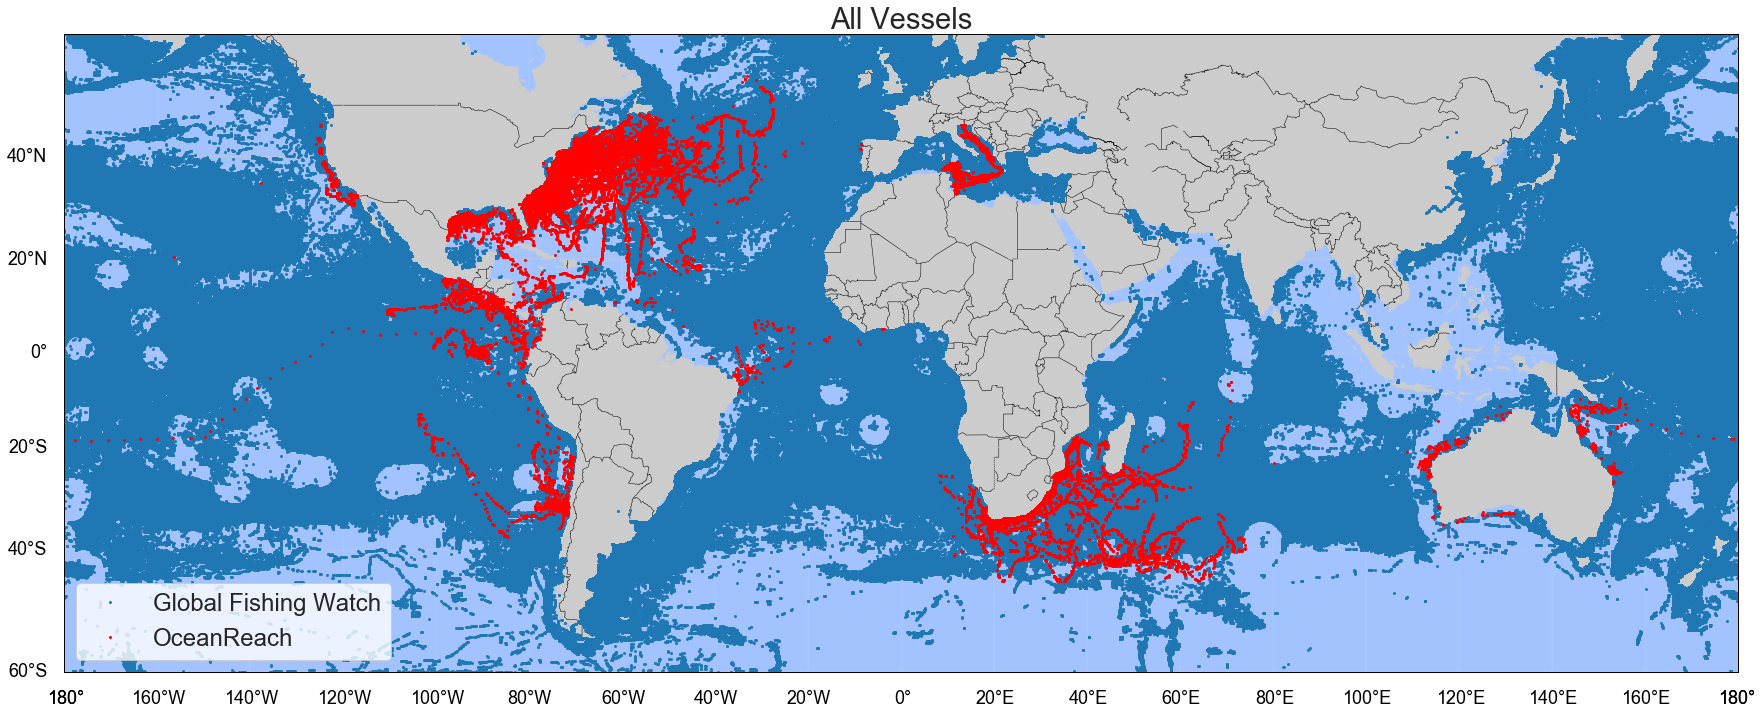

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from matplotlib import colors,colorbar
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

%matplotlib inline
# import pandas as pd
# from datetime import datetime, timedelta

import seaborn as sns

sns.set_style("white")
plt.figure(figsize=(30,30)) 

m = Basemap(llcrnrlon=min_lon, llcrnrlat=min_lat,
            urcrnrlon=max_lon, urcrnrlat=max_lat, projection='mill', resolution ='l')

m.drawmapboundary()
m.fillcontinents("#cccccc",lake_color="#cccccc")
parallels = np.arange(min_lat,max_lat,20.)
m.drawparallels(parallels,labels=[1,0,0,0],fontsize=18,color='#cccccc')
meridians = np.arange(min_lon,max_lon,20.)
m.drawmeridians(meridians,labels=[0,0,0,1],fontsize=18,color='#cccccc')

m.drawmapboundary(fill_color='#A2C3FF')
m.drawcountries()
x,y= m(lons_gfw, lats_gfw)
size = 3
m.plot(x,y,marker = 'o',markersize=size,markeredgecolor = 'none',
       alpha = 1,linestyle='None', label="Global Fishing Watch")

x,y= m(lons_or, lats_or)
size = 3
m.plot(x,y,marker = 'o',markersize=size,markeredgecolor = 'none',
       alpha = 1,linestyle='None', label="OceanReach", color = "red")


plt.title("All Vessels", 
         fontsize=29)
plt.legend(fontsize=24)
plt.show()